In [1]:
cd drive/MyDrive/table_try_on/

/content/drive/MyDrive/table_try_on


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_json('modcloth_final_data.json', lines=True)
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [4]:
df['ID'] = df.index

Точной инфы по колонкам нет, но есть вот:

In [5]:
# item_id- from item.
# waist- from user input.
# size - from item.
# quality- from user input.
# cup size- from user input.
# hips- from user input.
# bra size- from user input.
# category- from item.
# bust- from user input.
# height- from user input
# user_name- from user input
# length - from user input
# fit- from user input
# user_id- from user.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [7]:
df.describe()

,item_id,waist,size,quality,hips,bra size,user_id,shoe size,ID
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000,82790.00000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818,41394.50000
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109,23899.55873
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000,0.00000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000,20697.25000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000,41394.50000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000,62091.75000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000,82789.00000


### waist

In [8]:
col = "waist"

In [9]:
df[col].unique()

array([29., 31., 30., nan, 27., 26., 28., 25., 32., 34., 44., 33., 23.,
       49., 37., 42., 20., 35., 24., 36., 40., 38., 48., 22., 41., 21.,
       39., 45., 43., 46., 47., 50.])

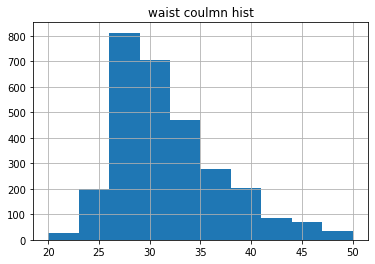

In [10]:
df[col].hist()
plt.title(f'{col} coulmn hist');

In [11]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column waist = 79908 out of 82790 or 0.9651890324918468%


Слишком много значений пропущено, придется удалить колонку

In [12]:
df.drop(col, axis=1, inplace=True)

### size

In [13]:
col = "size"

In [14]:
df[col].unique()

array([ 7, 13, 21, 18, 11,  5, 30, 24, 33,  3, 27, 15,  9, 12, 26, 20,  4,
        8, 32, 38,  1,  0,  6, 31, 10, 14, 17,  2, 25])

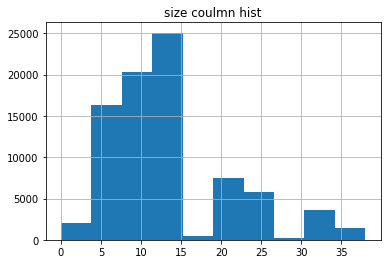

In [15]:
df[col].hist()
plt.title(f'{col} coulmn hist');

In [16]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column size = 0 out of 82790 or 0.0%


Тут все более менее норм, кроме распределения

In [17]:
df.groupby(col)['ID'].nunique()

size
0        31
1      1784
2        94
3       142
4     13883
5       851
6       775
7       777
8     17893
9       737
10     1164
11      542
12    17343
13      486
14      364
15     6883
17      235
18      251
20     7292
21      201
24      125
25        1
26     5656
27       94
30       65
31        1
32     3613
33       46
38     1461
Name: ID, dtype: int64

### category

In [18]:
col = 'category'

In [19]:
df[col].unique()

array(['new', 'dresses', 'wedding', 'sale', 'tops', 'bottoms',
       'outerwear'], dtype=object)

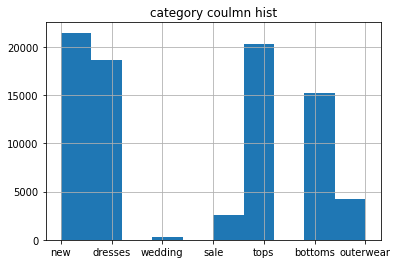

In [20]:
df[col].hist()
plt.title(f'{col} coulmn hist');

In [21]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column category = 0 out of 82790 or 0.0%


Тоже все норм

In [22]:
df['category'] = df['category'].astype('category')

In [23]:
df.groupby(col)['ID'].nunique()

category
bottoms      15266
dresses      18650
new          21488
outerwear     4223
sale          2524
tops         20364
wedding        275
Name: ID, dtype: int64

### cup size

In [24]:
col = 'cup size'

In [25]:
df[col].unique()

array(['d', 'b', 'dd/e', 'c', 'ddd/f', 'dddd/g', 'i', 'a', nan, 'h', 'aa',
       'j', 'k'], dtype=object)

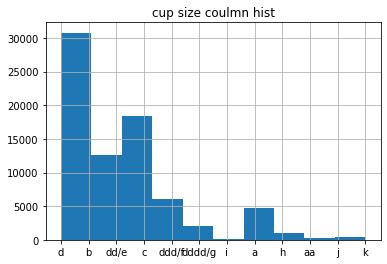

In [26]:
df[col].hist()
plt.title(f'{col} coulmn hist');

In [27]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column cup size = 6255 out of 82790 or 0.07555260297137335%


Пропущено не критично много, можно удалить эти строки

In [28]:
idxs2remove = df[df[col].isnull()].index
df.drop(idxs2remove, axis=0, inplace=True)

In [29]:
df[col] = df[col].astype('category').cat.as_ordered()

In [30]:
df.groupby(col)['ID'].nunique()

cup size
a          4791
aa          296
b         14628
c         18370
d         16149
dd/e      12557
ddd/f      6117
dddd/g     2008
h          1042
i           189
j           200
k           188
Name: ID, dtype: int64

### bra size

In [31]:
col = "bra size"

In [32]:
df[col].unique()

array([34., 36., 32., nan, 38., 42., 40., 44., 46., 30., 48., 28.])

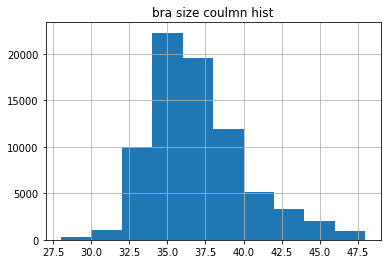

In [33]:
df[col].hist()
plt.title(f'{col} coulmn hist');

In [34]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column bra size = 123 out of 76535 or 0.0016071078591494087%


Тут скорее всего ситуация похоже на cup size, просто удалим

In [35]:
idxs2remove = df[df[col].isnull()].index
df.drop(idxs2remove, axis=0, inplace=True)

In [36]:
df[col] = df[col].astype(int) # чтобы дробную часть из значений убрать
df[col] = df[col].astype('category').cat.as_ordered()

In [37]:
df.groupby(col)['ID'].nunique()

bra size
28      255
30     1050
32     9974
34    22279
36    19535
38    11880
40     5098
42     3364
44     2005
46      596
48      376
Name: ID, dtype: int64

### hips

In [38]:
col = 'hips'

In [39]:
df[col].unique()

array([38., 30., nan, 41., 42., 50., 49., 60., 36., 44., 39., 35., 34.,
       32., 48., 52., 40., 46., 37., 45., 55., 51., 33., 53., 54., 47.,
       59., 43., 57., 58., 31., 56.])

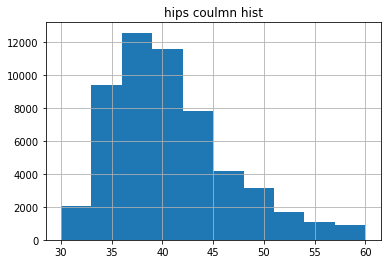

In [40]:
df[col].hist()
plt.title(f'{col} coulmn hist');

In [41]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column hips = 21939 out of 76412 or 0.2871145893315186%


Тут сложно, пока удалим

In [42]:
df.drop(col, axis=1, inplace=True)

### bust

In [43]:
col = 'bust'

In [44]:
df[col].unique()

array(['36', nan, '39', '34', '43', '35', '38', '33', '40', '41', '44',
       '45', '37', '30', '32', '42', '48', '46', '51', '25', '31', '26',
       '52', '22', '50', '47', '56', '49', '54', '55', '53', '27', '28',
       '29', '20', '57', '23', '37-39', '58', '24', '59'], dtype=object)

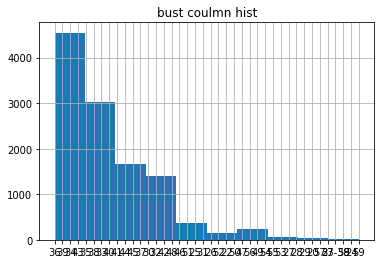

In [45]:
df[col].hist()
plt.title(f'{col} coulmn hist');

In [46]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column bust = 64897 out of 76412 or 0.8493037742762917%


Тоже походу надо удалять

In [47]:
df.drop(col, axis=1, inplace=True)

### height

In [48]:
col = 'height'

In [49]:
df[col].unique()

array(['5ft 6in', '5ft 2in', '5ft 7in', '5ft 4in', '5ft 3in', '5ft 5in',
       '5ft 10in', nan, '5ft 8in', '5ft', '5ft 9in', '5ft 1in',
       '5ft 11in', '4ft 11in', '4ft 10in', '6ft', '3ft 4in', '4ft 9in',
       '6ft 1in', '6ft 2in', '3ft', '4ft 7in', '6ft 3in', '4ft 4in',
       '7ft 11in', '4ft 8in', '3ft 11in', '6ft 5in', '3ft 3in', '6ft 4in',
       '6ft 6in', '6ft 8in', '7ft 5in', '3ft 6in', '7ft 3in', '7ft 7in',
       '4ft 5in', '3ft 2in', '4ft 2in'], dtype=object)

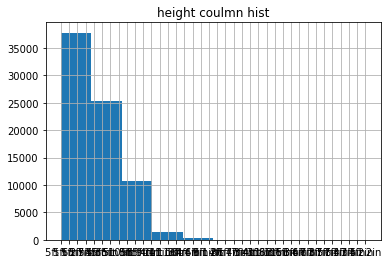

In [50]:
df[col].hist()
plt.title(f'{col} coulmn hist');

In [51]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column height = 703 out of 76412 or 0.00920012563471706%


Просто перевести в см и все ок, пропуски удалить

In [52]:
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
df['height'] = df['height'].apply(get_cms)

In [53]:
idxs2remove = df[df[col].isnull()].index
df.drop(idxs2remove, axis=0, inplace=True)

length

In [54]:
col = 'length'

In [55]:
df[col].unique()

array(['just right', 'slightly long', 'very short', 'slightly short',
       'very long', nan], dtype=object)

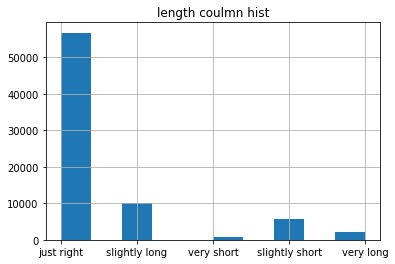

In [56]:
df[col].hist()
plt.title(f'{col} coulmn hist');

In [57]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column length = 17 out of 75709 or 0.00022454397759843613%


Тоже удаляем пропуски

In [58]:
idxs2remove = df[df[col].isnull()].index
df.drop(idxs2remove, axis=0, inplace=True)

In [59]:
df[col] = df[col].astype('category')

In [60]:
df.groupby(col)['ID'].nunique()

length
just right        56737
slightly long     10201
slightly short     5826
very long          2208
very short          720
Name: ID, dtype: int64

### fit

In [61]:
col = 'fit'

In [62]:
df[col].unique()

array(['small', 'large', 'fit'], dtype=object)

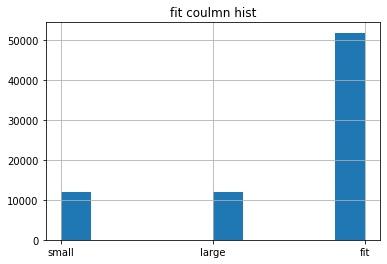

In [63]:
df[col].hist()
plt.title(f'{col} coulmn hist');

In [64]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column fit = 0 out of 75692 or 0.0%


Это лейбл колонка, и распределение кншн не очень

In [65]:
df.groupby(col)['ID'].nunique()

fit
fit      51878
large    11949
small    11865
Name: ID, dtype: int64

### quality

In [66]:
col = 'quality'

In [67]:
df[col].unique()

array([ 5.,  3.,  2.,  1.,  4., nan])

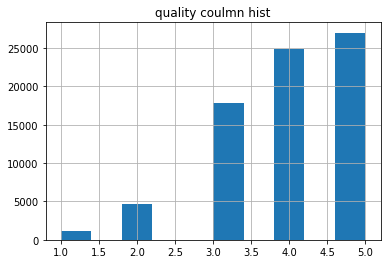

In [68]:
df[col].hist()
plt.title(f'{col} coulmn hist');

In [69]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column quality = 37 out of 75692 or 0.0004888231252972573%


Тоже удаляем пропуски и ок

In [70]:
idxs2remove = df[df[col].isnull()].index
df.drop(idxs2remove, axis=0, inplace=True)

In [71]:
df[col] = df[col].astype(int)

In [72]:
df.groupby(col)['ID'].nunique()

quality
1     1197
2     4678
3    17869
4    24905
5    27006
Name: ID, dtype: int64

### shoe size

In [73]:
col = 'shoe size'

In [74]:
df[col].unique()

array([ nan,  9. ,  8.5, 11. ,  7. ,  6. ,  8. ,  6.5, 10. ,  7.5,  5.5,
        9.5, 10.5,  5. , 11.5, 38. ])

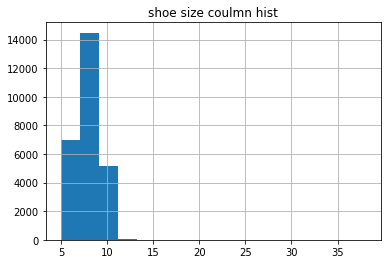

In [75]:
df[col].hist(bins=len(df[col].unique()))
plt.title(f'{col} coulmn hist');

In [76]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column shoe size = 48957 out of 75655 or 0.6471085850241226%


In [77]:
df.groupby(col)['ID'].nunique()

shoe size
5.0      300
5.5      566
6.0     1281
6.5     1768
7.0     3035
7.5     3566
8.0     3679
8.5     3822
9.0     3412
9.5     1707
10.0    2323
10.5     336
11.0     813
11.5      89
38.0       1
Name: ID, dtype: int64

Тут удаляем прикол с 38 размером, наны меняем на неизвестно и делаем фичу категориальной

In [78]:
df.drop(df[df[col]==38].index, axis=0, inplace=True)

In [79]:
df[col].fillna('Unknown', inplace=True)

In [80]:
df[col] = df[col].astype('str') # catboost не принимает в качве категориальной фичи float

### shoe width

In [81]:
col = 'shoe width'

In [82]:
df[col].unique()

array([nan, 'wide', 'average', 'narrow'], dtype=object)

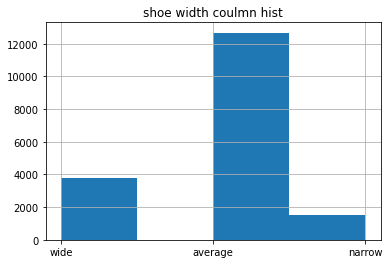

In [83]:
df[col].hist(bins=len(df[col].unique()))
plt.title(f'{col} coulmn hist');

In [84]:
print(f'NANs in the column {col} = {df[col].isna().sum()} out of {len(df)} or {df[col].isna().sum()/len(df)}%')

NANs in the column shoe width = 57709 out of 75654 or 0.7628017024876411%


In [85]:
df.groupby(col)['ID'].nunique()

shoe width
average    12677
narrow      1497
wide        3771
Name: ID, dtype: int64

Сейм как и размер ноги

In [86]:
df[col].fillna('Unknown', inplace=True)

In [87]:
df[col] = df[col].astype('category')

In [88]:
without_nans = []
for col in [i for i in df.columns if i not in ['ID', 'review_summary', 'review_text']]:
    # print(df.groupby(col)['ID'].nunique())
    print(f'NANs in {col} = {df[col].isna().sum()} out of {len(df)}')
    if df[col].isna().sum()==0:
        without_nans.append(col)
    # print()

NANs in item_id = 0 out of 75654
NANs in size = 0 out of 75654
NANs in quality = 0 out of 75654
NANs in cup size = 0 out of 75654
NANs in bra size = 0 out of 75654
NANs in category = 0 out of 75654
NANs in height = 0 out of 75654
NANs in user_name = 0 out of 75654
NANs in length = 0 out of 75654
NANs in fit = 0 out of 75654
NANs in user_id = 0 out of 75654
NANs in shoe size = 0 out of 75654
NANs in shoe width = 0 out of 75654


In [89]:
df.columns

Index(['item_id', 'size', 'quality', 'cup size', 'bra size', 'category',
       'height', 'user_name', 'length', 'fit', 'user_id', 'shoe size',
       'shoe width', 'review_summary', 'review_text', 'ID'],
      dtype='object')

review_summary, review_text

In [90]:
for i in df[df['review_summary'].notnull()][['review_summary', 'review_text']].sample(5).itertuples():
    print('Text:', i.review_text)
    print('Review:', i.review_summary)
    print()
    

Text: This has become my goto top. Any time it's clean and I'm throwing on jeans, I pull this out without even thinking. It's flattering and comfy
Review: This has become my goto t

Text: Received this dress as a gift from my Mom and cannot be more pleased! The fit is perfect for me and I love love love it. It's super cute and fun!
Review: Received this dress as a

Text: This dress is so cute I can overlook the fact that it smooshes my chest. I did however read that in other reviews and I bought it anyway. I wear a size 36 D, and though the dress fits great everywhere else, the bust is small. I would recommend wearing a petty coat underneath (I purchased a black one), because the skirt if the dress hangs much better with a petticoat. Super awesome dress, and the print is hilarious.
Review: This dress is so cute I c

Text: Super cute in the photos but not great in real life. They fit ok in the legs but I had that huge gap in the back. the material kind of felt weird too.
Review: Super c

Ревью повторяет исходный текст отзыва, поэтому дропнем ревью, а где нет отзыва вообще, заполним Unknown

In [91]:
df.drop('review_summary', axis=1, inplace=True)

In [92]:
df['review_text'].fillna('Unlnown', inplace=True)

Others

In [93]:
df.head()

,item_id,size,quality,cup size,bra size,category,height,user_name,length,fit,user_id,shoe size,shoe width,review_text,ID
0,123373,7,5,d,34,new,167.64,Emily,just right,small,991571,Unknown,Unknown,Unlnown,0
1,123373,13,3,b,36,new,157.48,sydneybraden2001,just right,small,587883,Unknown,Unknown,Unlnown,1
2,123373,7,2,b,32,new,170.18,Ugggh,slightly long,small,395665,9.0,Unknown,Unlnown,2
4,123373,18,5,b,36,new,157.48,dberrones1,slightly long,small,944840,Unknown,Unknown,Unlnown,4
5,123373,11,5,c,36,new,162.56,Doreenajane,just right,small,162012,Unknown,Unknown,Unlnown,5


In [94]:
df.drop(['user_id', 'ID', 'user_name'], axis=1, inplace=True)

## Модели

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75654 entries, 0 to 82789
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   item_id      75654 non-null  int64   
 1   size         75654 non-null  int64   
 2   quality      75654 non-null  int64   
 3   cup size     75654 non-null  category
 4   bra size     75654 non-null  category
 5   category     75654 non-null  category
 6   height       75654 non-null  float64 
 7   length       75654 non-null  category
 8   fit          75654 non-null  object  
 9   shoe size    75654 non-null  object  
 10  shoe width   75654 non-null  category
 11  review_text  75654 non-null  object  
dtypes: category(5), float64(1), int64(3), object(3)
memory usage: 5.0+ MB


In [96]:
cat_feats = df.select_dtypes('category').columns.tolist() + ['shoe size']
cat_feats

['cup size', 'bra size', 'category', 'length', 'shoe width', 'shoe size']

In [97]:
text_feats = ['review_text']

In [133]:
num_feats = [i for i in df.columns if i not in cat_feats+['review_text', 'fit']]
num_feats

['item_id', 'size', 'quality', 'height']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('fit', axis=1), df['fit'], test_size=0.2, shuffle=True)

In [99]:
df

,item_id,size,quality,cup size,bra size,category,height,length,fit,shoe size,shoe width,review_text
0,123373,7,5,d,34,new,167.64,just right,small,Unknown,Unknown,Unlnown
1,123373,13,3,b,36,new,157.48,just right,small,Unknown,Unknown,Unlnown
2,123373,7,2,b,32,new,170.18,slightly long,small,9.0,Unknown,Unlnown
4,123373,18,5,b,36,new,157.48,slightly long,small,Unknown,Unknown,Unlnown
5,123373,11,5,c,36,new,162.56,just right,small,Unknown,Unknown,Unlnown
...,...,...,...,...,...,...,...,...,...,...,...,...
82784,807722,4,3,a,32,outerwear,154.94,just right,large,6.5,average,"It ran a little big, and I'm not crazy about t..."
82785,807722,8,4,b,36,outerwear,172.72,just right,fit,8.5,average,Cute jacket!
82786,807722,12,5,ddd/f,34,outerwear,165.10,slightly long,small,Unknown,Unknown,It's a beautiful jacket. I love how it's knit ...
82787,807722,12,5,dddd/g,32,outerwear,162.56,just right,fit,Unknown,Unknown,I love this blazer. It is a great office piece...


Данные без текстовых отзывов

In [139]:
model = CatBoostClassifier(eval_metric='AUC')

model.fit(X_train.drop('review_text', axis=1), y_train, eval_set=(X_test.drop('review_text', axis=1), y_test), cat_features=cat_feats)

Learning rate set to 0.11721
0:	test: 0.6906540	best: 0.6906540 (0)	total: 385ms	remaining: 6m 24s
1:	test: 0.6882600	best: 0.6906540 (0)	total: 588ms	remaining: 4m 53s
2:	test: 0.6972564	best: 0.6972564 (2)	total: 912ms	remaining: 5m 3s
3:	test: 0.7006924	best: 0.7006924 (3)	total: 1.2s	remaining: 4m 58s
4:	test: 0.7012558	best: 0.7012558 (4)	total: 1.4s	remaining: 4m 38s
5:	test: 0.7022064	best: 0.7022064 (5)	total: 1.64s	remaining: 4m 31s
6:	test: 0.7039407	best: 0.7039407 (6)	total: 1.89s	remaining: 4m 27s
7:	test: 0.7063131	best: 0.7063131 (7)	total: 2.17s	remaining: 4m 28s
8:	test: 0.7087607	best: 0.7087607 (8)	total: 2.46s	remaining: 4m 30s
9:	test: 0.7102713	best: 0.7102713 (9)	total: 2.72s	remaining: 4m 28s
10:	test: 0.7107071	best: 0.7107071 (10)	total: 3.02s	remaining: 4m 31s
11:	test: 0.7117330	best: 0.7117330 (11)	total: 3.23s	remaining: 4m 26s
12:	test: 0.7122419	best: 0.7122419 (12)	total: 3.49s	remaining: 4m 24s
13:	test: 0.7137537	best: 0.7137537 (13)	total: 3.78s	rema

Данные с отзывами (обработка текстов самим CatBoost)

In [100]:
model = CatBoostClassifier(eval_metric='AUC')

model.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_feats, text_features=text_feats)

Learning rate set to 0.11721
0:	test: 0.6903752	best: 0.6903752 (0)	total: 1.24s	remaining: 20m 37s
1:	test: 0.6948444	best: 0.6948444 (1)	total: 2.22s	remaining: 18m 28s
2:	test: 0.6938597	best: 0.6948444 (1)	total: 3.3s	remaining: 18m 17s
3:	test: 0.7039689	best: 0.7039689 (3)	total: 4.32s	remaining: 17m 54s
4:	test: 0.7175478	best: 0.7175478 (4)	total: 5.33s	remaining: 17m 41s
5:	test: 0.7270719	best: 0.7270719 (5)	total: 6.34s	remaining: 17m 31s
6:	test: 0.7651227	best: 0.7651227 (6)	total: 7.57s	remaining: 17m 53s
7:	test: 0.7801959	best: 0.7801959 (7)	total: 8.72s	remaining: 18m 1s
8:	test: 0.7852412	best: 0.7852412 (8)	total: 9.8s	remaining: 17m 58s
9:	test: 0.7869176	best: 0.7869176 (9)	total: 10.8s	remaining: 17m 50s
10:	test: 0.7877095	best: 0.7877095 (10)	total: 11.9s	remaining: 17m 49s
11:	test: 0.7881257	best: 0.7881257 (11)	total: 13s	remaining: 17m 50s
12:	test: 0.7889777	best: 0.7889777 (12)	total: 14.1s	remaining: 17m 47s
13:	test: 0.7912002	best: 0.7912002 (13)	total:

Попробуем tfidf вместо обработки текста CatBoost

In [101]:
tfidf = TfidfVectorizer()

In [104]:
tfidf.fit(X_train['review_text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [106]:
X_train_text = tfidf.transform(X_train['review_text'])
X_test_text = tfidf.transform(X_test['review_text'])

Только отзывы

In [108]:
model = CatBoostClassifier(eval_metric='AUC', learning_rate=0.15)

model.fit(X_train_text, y_train, eval_set=(X_test_text, y_test))


0:	test: 0.7110669	best: 0.7110669 (0)	total: 1.97s	remaining: 32m 47s
1:	test: 0.7468481	best: 0.7468481 (1)	total: 3.49s	remaining: 29m
2:	test: 0.7502085	best: 0.7502085 (2)	total: 4.92s	remaining: 27m 16s
3:	test: 0.7525620	best: 0.7525620 (3)	total: 6.37s	remaining: 26m 27s
4:	test: 0.7597838	best: 0.7597838 (4)	total: 7.87s	remaining: 26m 5s
5:	test: 0.7618183	best: 0.7618183 (5)	total: 9.28s	remaining: 25m 37s
6:	test: 0.7728675	best: 0.7728675 (6)	total: 10.7s	remaining: 25m 20s
7:	test: 0.7778403	best: 0.7778403 (7)	total: 12.2s	remaining: 25m 9s
8:	test: 0.7778327	best: 0.7778403 (7)	total: 13.7s	remaining: 25m 7s
9:	test: 0.7810894	best: 0.7810894 (9)	total: 15.2s	remaining: 25m 2s
10:	test: 0.7848125	best: 0.7848125 (10)	total: 16.8s	remaining: 25m 9s
11:	test: 0.7896085	best: 0.7896085 (11)	total: 18.3s	remaining: 25m 5s
12:	test: 0.7923996	best: 0.7923996 (12)	total: 19.7s	remaining: 24m 55s
13:	test: 0.7959945	best: 0.7959945 (13)	total: 21.2s	remaining: 24m 52s
14:	test

In [136]:
X_ohe_train = pd.concat([pd.get_dummies(X_train[cat_feats]).reset_index(drop=True), X_train[num_feats].reset_index(drop=True)], axis=1)
X_ohe_test = pd.concat([pd.get_dummies(X_test[cat_feats]).reset_index(drop=True), X_test[num_feats].reset_index(drop=True)], axis=1)

In [137]:
from scipy.sparse import hstack 
X_train_tfidf = hstack([X_train_text, X_ohe_train])
X_test_tfidf = hstack([X_test_text, X_ohe_test])

Все данные + обработка текста tfidf

In [138]:
model = CatBoostClassifier(eval_metric='AUC')

model.fit(X_train_tfidf, y_train, eval_set=(X_test_tfidf, y_test))


Learning rate set to 0.11721
0:	test: 0.7169677	best: 0.7169677 (0)	total: 1.84s	remaining: 30m 40s
1:	test: 0.7547906	best: 0.7547906 (1)	total: 3.41s	remaining: 28m 23s
2:	test: 0.7759286	best: 0.7759286 (2)	total: 4.94s	remaining: 27m 22s
3:	test: 0.7845500	best: 0.7845500 (3)	total: 6.41s	remaining: 26m 35s
4:	test: 0.7877828	best: 0.7877828 (4)	total: 7.99s	remaining: 26m 29s
5:	test: 0.7919542	best: 0.7919542 (5)	total: 9.51s	remaining: 26m 16s
6:	test: 0.7940734	best: 0.7940734 (6)	total: 11s	remaining: 25m 59s
7:	test: 0.7957140	best: 0.7957140 (7)	total: 12.5s	remaining: 25m 56s
8:	test: 0.7987597	best: 0.7987597 (8)	total: 14.2s	remaining: 25m 59s
9:	test: 0.8061024	best: 0.8061024 (9)	total: 15.7s	remaining: 25m 56s
10:	test: 0.8136066	best: 0.8136066 (10)	total: 17.3s	remaining: 25m 52s
11:	test: 0.8138625	best: 0.8138625 (11)	total: 18.7s	remaining: 25m 41s
12:	test: 0.8170652	best: 0.8170652 (12)	total: 20.2s	remaining: 25m 35s
13:	test: 0.8182298	best: 0.8182298 (13)	tot

In [140]:
# Итого
# Много проблем с пропущенными значениями
# Очевидно, что большинство людей покупает либо одежду, либо обувь, а не вместе
# поэтому можно разные модели сделать для обуви и остальной одежды
# С отзывами все еще непонятно, если мы их используем при обучении (они есть в Х),
# значит и при инференсе они должны быть в Х (но можно КННом находить похожие и использовать на инференсе, но мб есть путь умнее)